## 1. INTRODUÇÃO

### 1.1. Contextualização do problema de fraudes

A prevenção e detecção de fraudes é de extrema importância para organizações dos mais diversos setores. Segundo Van Vlasselaer et al. (2015), “fraude é um crime incomum, bem planejado, cuidadosamente ocultado, que evolui ao longo do tempo e frequentemente é organizado de forma meticulosa, manifestando-se de diversas maneiras”. Em termos simples, trata-se do ato de enganar alguém com o objetivo de obter bens ou dinheiro de forma ilícita. Por isso, empresas buscam continuamente bloquear, controlar e prevenir transações fraudulentas, visando mitigar perdas financeiras e proteger sua integridade operacional (Baesens, Höppner, & Verdonck, 2021; Baesens, Van Vlasselaer, & Verbeke, 2015).

### 1.2. Objetivo do projeto
O objetivo deste projeto é identificar e analisar os principais fatores associados à ocorrência de transações fraudulentas, por meio de exploração estatística e modelagem preditiva, com foco na construção de um perfil característico das fraudes.

Para isso, iremos:
* Analisar o comportamento dos principais KPIs de fraude ao longo do tempo;
* Investigar a relação entre o valor das transações e a ocorrência de fraude;
* Identificar as regiões geográficas com maior incidência de fraudes;
* Verificar a associação entre documentação incompleta e transações fraudulentas;
* Avaliar quais categorias de produtos estão mais associadas a fraudes.

### 1.3. Desafio analítico
Quais são os principais fatores associados à ocorrência de transações fraudulentas, e como eles podem ser utilizados para caracterizar o perfil das fraudes?

### 1.4. Hipóteses iniciais
* Transações com valores elevados apresentam maior probabilidade de serem fraudulentas;
* Transações associadas a documentação incompleta apresentam maior chance de serem fraudulentas;
* Algumas categorias de produtos são desproporcionalmente associadas a transações fraudulentas.

### 1.5. Estrutura do projeto

## 2. IMPORTS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# import seaborn as sns

from matplotlib import rcParams

rcParams["font.sans-serif"] = "Arial"
rcParams["font.family"] = "Arial"

## 3. DADOS

### 3.1. Fonte dos dados

Os conjunto de dados foi obtido no PED (Preparatório para Entrevistas em Dados), da Prof.ª Renata Biaggi. Acesse: https://www.renatabiaggi.com/ped.

**Disclaimer**:
* Os dados utilizados representam apenas uma amostra do universo total de transações e, portanto, os valores absolutos de lucros e perdas não refletem os montantes reais da operação.

* Pressupõe-se que essa amostra é aleatória, não enviesada e suficientemente representativa do comportamento geral das variáveis e das relações entre elas, o que permite a realização de inferências exploratórias.

### 3.2. Carregamento dos dados

In [ ]:
# Carregar os dados e mostrar as primeiras linhas
df = pd.read_csv(
    filepath_or_buffer="/home/mcastro/Documents/visual_studio_code_files/case-fraude/data/dados.csv",  # caminho do arquivo
    sep=",",  # separador
    header=0,  # linha do cabeçalho
    dtype={
        "pais": "category",
        "produto": "string",
        "categoria_produto": "category",
    },  # tipos de dados
    parse_dates=["data_compra"],  # coluna a ser convertida para datetime
    date_format="%Y-%m-%d %H:%M:%S",  # formato da data
)

# Exibir as primeiras linhas do DataFrame
df.head()

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,data_compra,valor_compra,score_fraude_modelo,fraude
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,0.883598,240.0,102.0,1,NaN,N,2020-03-27 11:51:16,5.64,66,0
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,0.376019,4008.0,0.0,1,Y,N,2020-04-15 19:58:08,124.71,72,0
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,0.516368,1779.0,77.0,1,NaN,N,2020-03-25 18:13:38,339.32,95,0
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,0.154036,1704.0,1147.0,1,NaN,Y,2020-04-16 16:03:10,3.54,2,0
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,0.855798,1025.0,150.0,1,NaN,N,2020-04-02 10:24:45,3.53,76,0


In [16]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   score_1              150000 non-null  int64         
 1   score_2              137016 non-null  float64       
 2   score_3              137016 non-null  float64       
 3   score_4              149635 non-null  float64       
 4   score_5              150000 non-null  float64       
 5   score_6              149989 non-null  float64       
 6   pais                 149806 non-null  category      
 7   score_7              150000 non-null  int64         
 8   produto              150000 non-null  string        
 9   categoria_produto    150000 non-null  category      
 10  score_8              150000 non-null  float64       
 11  score_9              149989 non-null  float64       
 12  score_10             149635 non-null  float64       
 13  entrega_doc_1 

In [ ]:
# Substituindo 'Y' por 1 e 'N' por 0 - NaN considerado como 'N'
df["entrega_doc_2"] = np.where(df["entrega_doc_2"] == "Y", 1, 0)
df["entrega_doc_3"] = np.where(df["entrega_doc_3"] == "Y", 1, 0)

In [ ]:
# Manter somente data sem hora
df["data_compra"] = df["data_compra"].apply(lambda x: x.date())

In [19]:
# Verificando se há duplicados
df.duplicated().any()

np.False_

### 3.3. Variáveis numéricas

In [ ]:
# Variáveis e suas quantidades de valores não-nulos
print("Variável numérica | Quantidade de valores não-nulos")
print(df.select_dtypes("number").count())

Variável numérica | Quantidade de valores não-nulos
score_1                150000
score_2                137016
score_3                137016
score_4                149635
score_5                150000
score_6                149989
score_7                150000
score_8                150000
score_9                149989
score_10               149635
entrega_doc_1          150000
entrega_doc_2          150000
entrega_doc_3          150000
valor_compra           150000
score_fraude_modelo    150000
fraude                 150000
dtype: int64


### 3.4. Variáveis categóricas

In [ ]:
# Variáveis categóricas e suas quantidades de valores não-nulos
print("Variável categórica | Quantidade de valores não-nulos")
print(df.select_dtypes(["string", "category"]).count())

Variável categórica | Quantidade de valores não-nulos
pais                 149806
produto              150000
categoria_produto    150000
dtype: int64


## 4. ANÁLISE DOS INDICADORES-CHAVE (KPIS)

### 4.1. Identificação dos principais KPIs

A definição dos KPIs parte do mapeamento dos *objetivos estratégicos* do negócio. Para isso, é importante compreender o propósito da organização, seu público-alvo, as operações envolvidas e a infraestrutura necessária — além de identificar riscos e desafios competitivos.

A partir dos objetivos estratégicos, elaboram-se as *KPQs (Key Performance Questions)* — perguntas que ajudam a avaliar se os objetivos estão sendo atingidos. Essa abordagem evita o foco em métricas irrelevantes e direciona a análise para indicadores que realmente refletem a performance do negócio.

Neste projeto, foram definidos os seguintes objetivos estratégicos para o e-commerce: *aumentar as receitas* e *maximizar o lucro*. Com base nisso, propuseram-se as seguintes KPQs:

- Até que ponto estamos aumentando nossas margens de lucro?
- Quão bem estamos identificando transações fraudulentas?
- Quão bem estamos prevenindo que transações fraudulentas ocorram?

Para responder a essas perguntas, foram selecionados os seguintes KPIs:

- **Taxa de fraude**
- **Taxa de fraude por categoria de produto**
- **Valor médio das fraudes**
- **Valor médio dos pedidos legítimos**
- **Receita com pedidos legítimos**
- **Fraudes por região**

Esses KPIs são úteis para caracterizar o perfil das fraudes e **não dependem de dados de recusa automática (auto-decline)** — que não estão disponíveis neste conjunto de dados.

### 4.2. Evolução diária das fraudes e seus efeitos no lucro

A taxa de fraudes representa a proporção de pedidos fraudulentos em relação ao total de pedidos realizados. Sua fórmula é dada por:

$$ \text{Taxa de fraude} = \frac{\text{Qtd. de pedidos fraudulentos}}{\text{Total de pedidos}} $$

Taxas de fraude elevadas podem comprometer significativamente os resultados financeiros da empresa, sendo, portanto, um indicador crítico a ser monitorado e mantido sob controle.

É importante ressaltar que o dataset não inclui informações sobre auto-declines — pedidos recusados automaticamente antes da finalização. Como esses pedidos não entram no total analisado, a taxa de fraudes pode estar artificialmente inflada. Essa limitação pode introduzir imprecisões na interpretação do indicador e deve ser considerada na análise.

#### 4.2.1. Obtenção dos dados diários

Utilizou-se a função `pivot_table()` do `pandas` para agrupar os dados por data de compra e tipo de transação (fraude ou não-fraude), com o cálculo do volume de pedidos, valor total e valor médio das compras.

Em seguida, foram calculados o volume e o valor total dos pedidos diários, a taxa de fraude, as receitas e o lucro obtido em cada dia.

Adicionalmente, foi calculada a média móvel de 3 dias para suavizar variações pontuais e facilitar a identificação de tendências de curto prazo.

In [ ]:
# Agrupar por data e fraude, e calcular volume, valor total e valor médio
fraudes_df = pd.pivot_table(
    df,
    index="data_compra",
    columns="fraude",
    values="valor_compra",
    aggfunc=["count", "sum", "mean"],
)

# Limpar nomes das colunas
fraudes_df.columns = [
    "_".join(map(str, col)).strip() for col in fraudes_df.columns.values
]
fraudes_df.reset_index(inplace=True)

# Renomear colunas
fraudes_df.rename(
    columns={
        "count_0": "volume_nao_fraude",
        "count_1": "volume_fraude",
        "sum_0": "valor_nao_fraude",
        "sum_1": "valor_fraude",
        "mean_0": "valor_medio_nao_fraude",
        "mean_1": "valor_medio_fraude",
    },
    inplace=True,
)

# Calcular volume e valor total de pedidos e taxa de fraude
fraudes_df["volume_total"] = (
    fraudes_df["volume_nao_fraude"] + fraudes_df["volume_fraude"]
)
fraudes_df["taxa_fraude"] = fraudes_df["volume_fraude"] / fraudes_df["volume_total"]
fraudes_df["valor_total"] = fraudes_df["valor_nao_fraude"] + fraudes_df["valor_fraude"]

# Calcular receitas e lucro (10% de pedidos legítimos, 100% de perda nas fraudes)
fraudes_df["receitas"] = 0.10 * fraudes_df["valor_nao_fraude"]
fraudes_df["lucro"] = fraudes_df["receitas"] - fraudes_df["valor_fraude"]

# Calcular média móvel de 3 dias para a taxa de fraude
fraudes_df["taxa_fraude_mm3"] = fraudes_df["taxa_fraude"].rolling(window=3).mean()

# Criar coluna com mês (nome abreviado)
fraudes_df.insert(
    loc=1,
    column="mes_compra",
    value=fraudes_df["data_compra"].apply(lambda x: x.strftime("%b")),
)

# Visualizar o DataFrame
fraudes_df.head()

,data_compra,mes_compra,volume_nao_fraude,volume_fraude,valor_nao_fraude,valor_fraude,valor_medio_nao_fraude,valor_medio_fraude,volume_total,taxa_fraude,valor_total,receitas,lucro,taxa_fraude_mm3
0,2020-03-08,Mar,2714,124,113830.82,9798.05,41.942085,79.016532,2838,0.043693,123628.87,11383.082,1585.032,NaN
1,2020-03-09,Mar,3976,197,190010.34,14666.02,47.789321,74.446802,4173,0.047208,204676.36,19001.034,4335.014,NaN
2,2020-03-10,Mar,3918,187,182384.29,17908.67,46.550355,95.768289,4105,0.045554,200292.96,18238.429,329.759,0.045485
3,2020-03-11,Mar,3696,203,183992.13,20076.90,49.781420,98.900985,3899,0.052065,204069.03,18399.213,-1677.687,0.048276
4,2020-03-12,Mar,3606,181,163283.66,13874.92,45.281104,76.657017,3787,0.047795,177158.58,16328.366,2453.446,0.048471


In [ ]:
# Shape - linhas x colunas
fraudes_df.shape

(45, 14)

#### 4.2.2. Taxa de fraudes diária e média móvel

O período analisado vai de 08/03 a 21/04, totalizando 45 dias. A figura abaixo mostra a variação da taxa de fraudes ao longo desse intervalo, com destaque para seus picos e vales. Observa-se um aumento do indicador na segunda quinzena de março, seguido por uma queda até o início da segunda quinzena de abril, quando a taxa volta a subir. Esse padrão pode indicar a presença de certa sazonalidade no comportamento das fraudes.

Cabe destacar, no entanto, que o período analisado — de apenas 45 dias — é relativamente curto, o que limita a robustez de quaisquer conclusões sobre padrões temporais ou comportamentos sazonais.

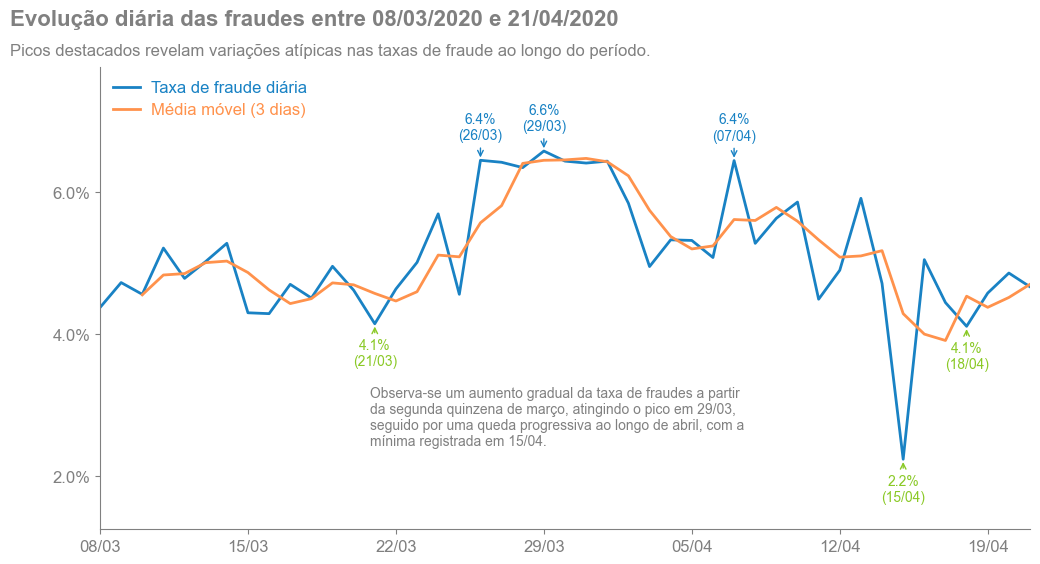

In [36]:
# Figura e eixos
fig, ax = plt.subplots(figsize=(12, 6), facecolor="white")

# Linhas principais - Taxa de fraude e média móvel
cols = ["taxa_fraude", "taxa_fraude_mm3"]
colors = ["#1982c4", "#FF924C"]
labels = ["Taxa de fraude diária", "Média móvel (3 dias)"]

for col, color, label in zip(cols, colors, labels):
    ax.plot(
        fraudes_df["data_compra"],
        fraudes_df[col],
        color=color,
        lw=2,
        label=label,
    )

# Eixo Y formatado em percentual
ax.set_ylim(0.0125, 0.0775)
ax.set_yticks([0.02, 0.04, 0.06])
ax.yaxis.set_major_formatter("{x:,.1%}")

# Eixo X formatado
di = fraudes_df["data_compra"].min()
dfl = fraudes_df["data_compra"].max()
ax.set_xlim(di, dfl)
ax.set_xticks(pd.date_range(di, dfl, freq="7D"))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d/%m"))

# Ticks
ax.tick_params(colors="grey", labelsize=12, labelcolor="grey")

# Título e subtítulo
fig.text(
    x=0.05,
    y=0.95,
    s=f"Evolução diária das fraudes entre {di:%d/%m/%Y} e {dfl:%d/%m/%Y}",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

fig.text(
    x=0.05,
    y=0.90,
    s="Picos destacados revelam variações atípicas nas taxas de fraude ao longo do período.",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Maiores taxas de fraude
top_picos = fraudes_df.nlargest(3, "taxa_fraude")
for _, row in top_picos.iterrows():
    ax.annotate(
        text=f"{row['taxa_fraude']:.1%}\n({row['data_compra'].strftime('%d/%m')})",
        xy=(row["data_compra"], row["taxa_fraude"]),
        xytext=(0, 15),
        textcoords="offset points",
        ha="center",
        fontsize=10,
        color="#1982c4",
        fontname="Arial",
        arrowprops=dict(arrowstyle="->", color="#1982c4"),
    )

# Menores taxas de fraude
bottom_picos = fraudes_df.nsmallest(3, "taxa_fraude")
for _, row in bottom_picos.iterrows():
    ax.annotate(
        text=f"{row['taxa_fraude']:.1%}\n({row['data_compra'].strftime('%d/%m')})",
        xy=(row["data_compra"], row["taxa_fraude"]),
        xytext=(0, -30),
        textcoords="offset points",
        ha="center",
        fontsize=10,
        color="#8AC926",
        fontname="Arial",
        arrowprops=dict(arrowstyle="->", color="#8AC926"),
    )

# Comentários
fig.text(
    x=0.35,
    y=0.25,
    s="Observa-se um aumento gradual da taxa de fraudes a partir \nda segunda quinzena de março, atingindo o pico em 29/03,\nseguido por uma queda progressiva ao longo de abril, com a \nmínima registrada em 15/04.",
    fontdict={"fontname": "Arial", "fontsize": 10, "color": "grey"},
)

# Legenda
legend = ax.legend(loc="upper left", frameon=False)
for text, color in zip(legend.get_texts(), colors):
    text.set_fontfamily("Arial")
    text.set_color(color)
    text.set_fontsize(12)

# Spines
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["bottom", "left"]].set_color("grey")

# Show
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/1-taxa_fraude_diaria.png",
    dpi="figure",
)

#### 4.2.3. Lucros das transações diárias

Considerando uma margem de 10%, a receita com pedidos legítimos é calculada pela seguinte fórmula:

$$\text{Receita com pedidos legítimos} = 0{,}10 \times \text{Valor dos pedidos legítimos}$$

O lucro corresponde simplesmente à diferença entre a receita e as perdas com fraudes. Assim, o *crescimento dos lucros* dependerá tanto da quantidade quanto do valor dos pedidos — legítimos e fraudulentos. Quanto maior o volume e o valor das fraudes, maiores serão as perdas.

Dessa forma, a taxa de fraudes está diretamente ligada tanto à receita quanto ao lucro. Quando elevada, ela pode impactar significativamente os resultados financeiros, reduzindo as margens de lucro — o que reforça a importância de seu monitoramento constante.

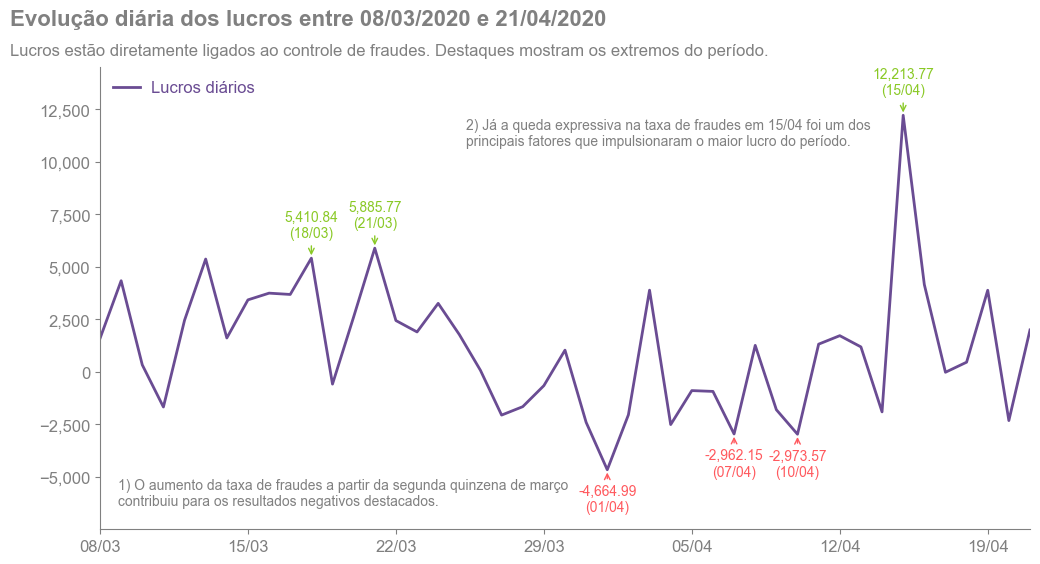

In [ ]:
# Figura e eixos
fig, ax = plt.subplots(figsize=(12, 6), facecolor="white")

# Linha - Lucro
ax.plot(
    fraudes_df["data_compra"],
    fraudes_df["lucro"],
    color="#6A4C93",
    lw=2,
    label="Lucros diários",
)


# Eixo Y formatado
ax.set_ylim(-7500, 14500)
ax.set_yticks(np.arange(-5000, 15000, 2500))
ax.yaxis.set_major_formatter("{x:,.0f}")

# Eixo X formatado
di = fraudes_df["data_compra"].min()
dfl = fraudes_df["data_compra"].max()
ax.set_xlim(di, dfl)
ax.set_xticks(pd.date_range(di, dfl, freq="7D"))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d/%m"))

# Ticks
ax.tick_params(colors="grey", labelsize=12, labelcolor="grey")

# Título e subtítulo
fig.text(
    x=0.05,
    y=0.95,
    s=f"Evolução diária dos lucros entre {di:%d/%m/%Y} e {dfl:%d/%m/%Y}",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

fig.text(
    x=0.05,
    y=0.90,
    s="Lucros estão diretamente ligados ao controle de fraudes. Destaques mostram os extremos do período.",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Maiores lucros
top_picos = fraudes_df.nlargest(3, "lucro")
for _, row in top_picos.iterrows():
    ax.annotate(
        text=f"{row['lucro']:,.2f}\n({row['data_compra'].strftime('%d/%m')})",
        xy=(row["data_compra"], row["lucro"]),
        xytext=(0, 15),
        textcoords="offset points",
        ha="center",
        fontsize=10,
        color="#8AC926",
        fontname="Arial",
        arrowprops=dict(arrowstyle="->", color="#8AC926"),
    )

# Menores lucros
bottom_picos = fraudes_df.nsmallest(3, "lucro")
for _, row in bottom_picos.iterrows():
    ax.annotate(
        text=f"{row['lucro']:,.2f}\n({row['data_compra'].strftime('%d/%m')})",
        xy=(row["data_compra"], row["lucro"]),
        xytext=(0, -30),
        textcoords="offset points",
        ha="center",
        fontsize=10,
        color="#FF595E",
        fontname="Arial",
        arrowprops=dict(arrowstyle="->", color="#FF595E"),
    )


# Comentários
fig.text(
    x=0.14,
    y=0.15,
    s="1) O aumento da taxa de fraudes a partir da segunda quinzena de março \ncontribuiu para os resultados negativos destacados.",
    fontdict={"fontname": "Arial", "fontsize": 10, "color": "grey"},
)

fig.text(
    x=0.43,
    y=0.75,
    s="2) Já a queda expressiva na taxa de fraudes em 15/04 foi um dos \nprincipais fatores que impulsionaram o maior lucro do período.",
    fontdict={"fontname": "Arial", "fontsize": 10, "color": "grey"},
)

# Legenda
legend = ax.legend(loc="upper left", frameon=False)
for text, color in zip(legend.get_texts(), colors):
    text.set_fontfamily("Arial")
    text.set_color("#6A4C93")
    text.set_fontsize(12)

# Spines
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["bottom", "left"]].set_color("grey")

# Show
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/2-lucros_diarios.png",
    dpi="figure",
)

#### 4.2.4. Valor médio das transações (fraudulentas e legítimas)

Esses KPIs representam o *valor médio* por transação, calculados pela divisão entre o valor total e a quantidade de pedidos. Funcionam, portanto, como uma espécie de “ticket médio”.

Esses indicadores estão diretamente relacionados às receitas e despesas da empresa. De modo geral, um *valor médio dos pedidos legítimos* mais alto é desejável, já que uma porcentagem desse valor se converte em receita. Por outro lado, um *valor médio das fraudes* elevado é prejudicial, pois representa perdas financeiras em cada transação fraudulenta.

As fórmulas utilizadas são:

$$\text{Valor médio das fraudes} = \frac{\text{Valor total das fraudes}}{\text{Quantidade de fraudes}}$$

<br>

$$\text{Valor médio dos pedidos legítimos} = \frac{\text{Valor total dos pedidos legítimos}}{\text{Quantidade de pedidos legítimos}}$$

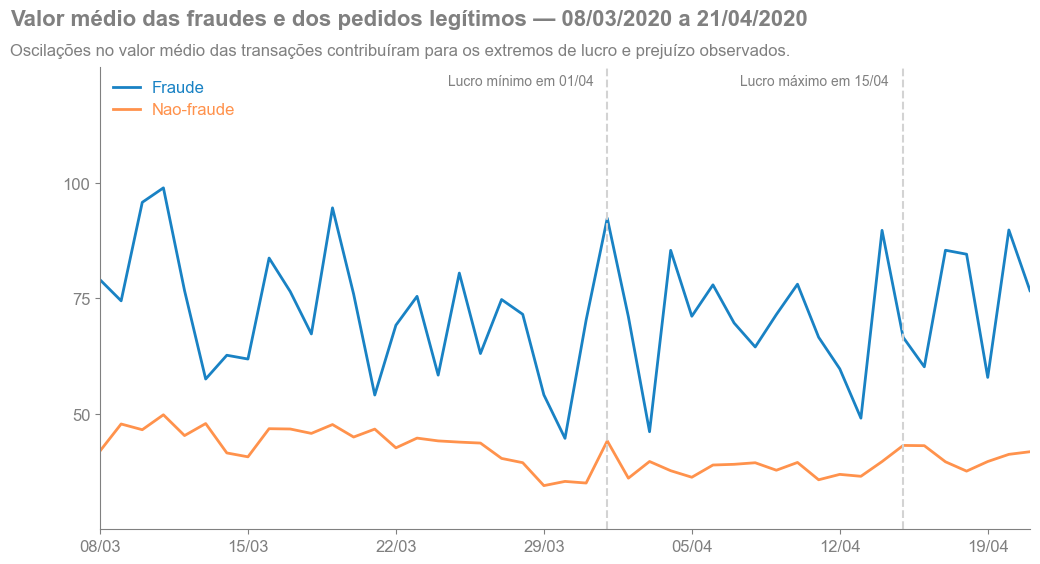

In [39]:
# Figura e eixos
fig, ax = plt.subplots(figsize=(12, 6), facecolor="white")

# Linhas principais - Valor médio
cols = ["valor_medio_fraude", "valor_medio_nao_fraude"]
colors = ["#1982c4", "#FF924C"]
labels = ["Fraude", "Nao-fraude"]

for col, color, label in zip(cols, colors, labels):
    ax.plot(
        fraudes_df["data_compra"],
        fraudes_df[col],
        color=color,
        lw=2,
        label=label,
    )

# Eixo Y formatado
ax.set_ylim(25, 125)
ax.set_yticks([50, 75, 100])
ax.yaxis.set_major_formatter("{x:,.0f}")

# Eixo X formatado
di = fraudes_df["data_compra"].min()
dfl = fraudes_df["data_compra"].max()
ax.set_xlim(di, dfl)
ax.set_xticks(pd.date_range(di, dfl, freq="7D"))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d/%m"))

# Ticks
ax.tick_params(colors="grey", labelsize=12, labelcolor="grey")

# Título e subtítulo
fig.text(
    x=0.05,
    y=0.95,
    s=f"Valor médio das fraudes e dos pedidos legítimos — 08/03/2020 a 21/04/2020",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

fig.text(
    x=0.05,
    y=0.90,
    s="Oscilações no valor médio das transações contribuíram para os extremos de lucro e prejuízo observados.",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Linha vertical no dia com maior lucro
maior_lucro = fraudes_df.nlargest(1, "lucro")
ax.axvline(
    x=maior_lucro["data_compra"].iloc[0],
    ymin=0,
    ymax=1,
    linestyle="--",
    color="lightgrey",
)

# Linha vertical no dia com menor lucro
menor_lucro = fraudes_df.nsmallest(1, "lucro")
ax.axvline(
    x=menor_lucro["data_compra"].iloc[0],
    ymin=0,
    ymax=1,
    linestyle="--",
    color="lightgrey",
)

# Comentários
fig.text(
    x=0.415,
    y=0.85,
    s=f"Lucro mínimo em {menor_lucro['data_compra'].iloc[0]:%d/%m}",
    fontdict={"fontname": "Arial", "fontsize": 10, "color": "grey"},
)

fig.text(
    x=0.658,
    y=0.85,
    s=f"Lucro máximo em {maior_lucro['data_compra'].iloc[0]:%d/%m}",
    fontdict={"fontname": "Arial", "fontsize": 10, "color": "grey"},
)

# Legenda
legend = ax.legend(loc="upper left", frameon=False)
for text, color in zip(legend.get_texts(), colors):
    text.set_fontfamily("Arial")
    text.set_color(color)
    text.set_fontsize(12)

# Spines
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["bottom", "left"]].set_color("grey")

# Mostrar gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/3-valor_medio_diario.png",
    dpi="figure",
)

### 4.3. Tendências mensais e lucros

Aqui, investigou-se qual foi desempenho mensal, com os indicadores sendo calculados para os meses de março e abril. 

#### 4.3.1. Obtenção dos dados mensais

Novamente, os dados foram agrupados com por meio da função `pivot_table` do `pandas`. Foram calculados volume, valor, valor médio, taxa de fraude e lucro, por mês e por tipo de transação (fraude ou não-fraude).

In [41]:
# Criar coluna com mês (formato AAAA-MM) para agrupamento
df["mes"] = df["data_compra"].apply(lambda x: x.strftime("%b"))

# Agrupar por mês e fraude e calcular volume, valor total e valor médio
fraudes_mth = pd.pivot_table(
    df,
    index="mes",
    columns="fraude",
    values="valor_compra",
    aggfunc=["count", "sum", "mean"],
    sort=False,
)

# Limpar nomes das colunas
fraudes_mth.columns = [
    "_".join(map(str, col)).strip() for col in fraudes_mth.columns.values
]
fraudes_mth.reset_index(inplace=True)

# Renomear colunas
fraudes_mth.rename(
    columns={
        "count_0": "volume_nao_fraude",
        "count_1": "volume_fraude",
        "sum_0": "valor_nao_fraude",
        "sum_1": "valor_fraude",
        "mean_0": "valor_medio_nao_fraude",
        "mean_1": "valor_medio_fraude",
    },
    inplace=True,
)

# Calcular volume total, taxa de fraude, receitas e lucro
fraudes_mth["volume_total"] = (
    fraudes_mth["volume_nao_fraude"] + fraudes_mth["volume_fraude"]
)
fraudes_mth["taxa_fraude"] = fraudes_mth["volume_fraude"] / fraudes_mth["volume_total"]
fraudes_mth["receitas"] = 0.10 * fraudes_mth["valor_nao_fraude"]
fraudes_mth["lucro"] = fraudes_mth["receitas"] - fraudes_mth["valor_fraude"]

# Visualizar o DataFrame
fraudes_mth.head()

,mes,volume_nao_fraude,volume_fraude,valor_nao_fraude,valor_fraude,valor_medio_nao_fraude,valor_medio_fraude,volume_total,taxa_fraude,receitas,lucro
0,Mar,73084,3877,3240261.9,282179.80,44.336132,72.783028,76961,0.050376,324026.19,41846.39
1,Apr,69416,3623,2740937.1,265091.32,39.485668,73.169009,73039,0.049604,274093.71,9002.39


#### 4.3.2. Receitas e perdas mensais

O desempenho de abril foi significativamente inferior ao de março. Essa queda pode ser atribuída a três fatores principais: (1) redução no volume de pedidos, (2) aumento no valor médio das fraudes e (3) diminuição no valor médio dos pedidos legítimos. Esses elementos, em conjunto, resultaram em uma queda mais acentuada das receitas do que das despesas, comprimindo as margens de lucro.

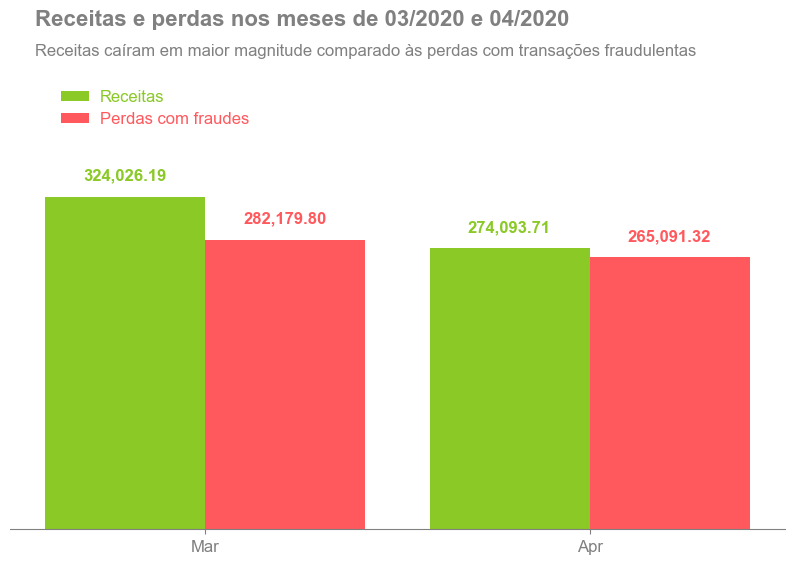

In [42]:
# Figura e eixos
fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")

# Colunas e propriedades
cols = ["receitas", "valor_fraude"]
colors = ["#8AC926", "#FF595E"]
labels = ["Receitas", "Perdas com fraudes"]
width = 0.25

# Eixo x automático com base no número de meses
x = np.linspace(0, 0.6, len(fraudes_mth))

# Gráfico de barras agrupadas
for i, (col, label, color) in enumerate(zip(cols, labels, colors)):
    offset = width * i
    bars = ax.bar(x + offset, fraudes_mth[col], width=width, label=label, color=color)

    ax.bar_label(
        bars,
        padding=10,
        fmt="{:,.2f}",
        fontname="Arial",
        fontsize=12,
        color=color,
        weight="bold",
    )

# Ticks no eixo x com nomes dos meses
ax.set_xticks(x + width / 2)
ax.set_xticklabels(fraudes_mth["mes"], fontname="Arial", fontsize=12, color="grey")
ax.tick_params(colors="grey", labelsize=12, labelcolor="grey")

# Ocultar eixo y
ax.yaxis.set_visible(False)

# Limite superior para o y
ax.set_ylim(0, 450000)

# Título
fig.text(
    x=0.15,
    y=0.95,
    s="Receitas e perdas nos meses de 03/2020 e 04/2020",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

# Subtítulo
fig.text(
    x=0.15,
    y=0.90,
    s="Receitas caíram em maior magnitude comparado às perdas com transações fraudulentas",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Spines
ax.spines[["top", "right", "left"]].set_visible(False)
ax.spines["bottom"].set_color("grey")

# Legenda
legend = ax.legend(loc="upper left", bbox_to_anchor=(0.05, 0.98))
for text, color in zip(legend.get_texts(), colors):
    text.set_fontfamily("Arial")
    text.set_color(color)
    text.set_fontsize(12)
legend.legendPatch.set_linewidth(0)

# Mostrar gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/4-receitas_perdas_mensal.png",
    dpi="figure",
)

#### 4.3.3. Lucros acumulados por mês

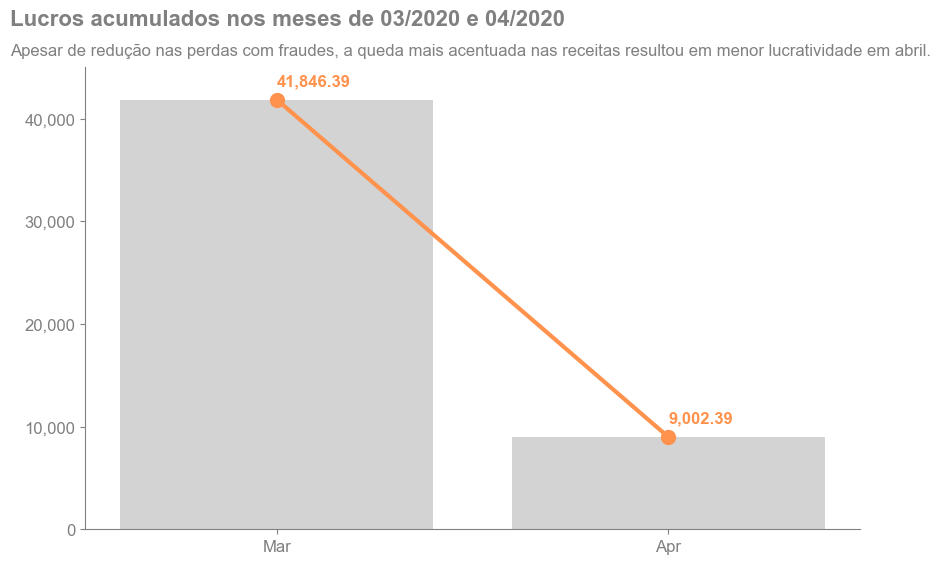

In [43]:
# Figura e eixos
fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")

# Vertical bar chart
bar = ax.bar(x="mes", height="lucro", data=fraudes_mth, color="lightgrey")

ax.plot(
    fraudes_mth["mes"],
    fraudes_mth["lucro"],
    color="#FF924C",
    marker="o",
    markersize=10,
    lw=3,
)

xs = fraudes_mth["mes"]
ys = fraudes_mth["lucro"]
for x, y in zip(xs, ys):

    label = "{:,.2f}".format(y)

    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha="left",
        fontfamily="Arial",
        fontsize=12,
        weight="bold",
        color="#FF924C",
    )

# Formatar eixos
ax.set_ylim(0, 45000)
ax.yaxis.set_major_formatter("{x:,.0f}")
ax.set_yticks([0, 10000, 20000, 30000, 40000])
ax.tick_params(colors="grey", labelsize=12, labelcolor="grey")

# Título
fig.text(
    x=0.05,
    y=0.95,
    s="Lucros acumulados nos meses de 03/2020 e 04/2020",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

# Subtítulo
fig.text(
    x=0.05,
    y=0.90,
    s="Apesar de redução nas perdas com fraudes, a queda mais acentuada nas receitas resultou em menor lucratividade em abril.",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Limpar bordas
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["bottom", "left"]].set_color("grey")

# Mostrar gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/5-lucros_acumulados_mensal.png",
    dpi="figure",
)

### 4.4. Desempenho regional: vendas, lucros e riscos

Aqui, buscou-se identificar quais as regiões que mais contribuem para os resultados do negócio e qual a situação dos indicadores de fraude nessas regiões. 

#### 4.4.1. Obtenção dos dados por região

As regiões com maior volume de pedidos são o Brasil (BR) e a Argentina (AR), que juntas respondem por mais de 95% do total. Por isso, a análise foi concentrada nas 5 regiões com maior volume de pedidos, que representam praticamente 100% das transações.

In [48]:
# Agrupar por país e fraude
fraudes_regiao_df = pd.pivot_table(
    df,
    index="pais",
    columns="fraude",
    values="valor_compra",
    aggfunc=["count", "sum", "mean"],
    observed=False,
    dropna=False,
)

# Limpar nomes das colunas
fraudes_regiao_df.columns = [
    "_".join(map(str, col)).strip() for col in fraudes_regiao_df.columns.values
]

# Renomear colunas
fraudes_regiao_df.rename(
    columns={
        "count_0": "volume_nao_fraude",
        "count_1": "volume_fraude",
        "sum_0": "valor_nao_fraude",
        "sum_1": "valor_fraude",
        "mean_0": "valor_medio_nao_fraude",
        "mean_1": "valor_medio_fraude",
    },
    inplace=True,
)

# Calcular total de pedidos por país
fraudes_regiao_df["volume_total"] = (
    fraudes_regiao_df["volume_nao_fraude"] + fraudes_regiao_df["volume_fraude"]
)

# Ordenar do maior para o menor volume
fraudes_regiao_df.sort_values(by="volume_total", ascending=False, inplace=True)

# Calcular percentual acumulado de pedidos
fraudes_regiao_df["volume_acumulado_pct"] = (
    fraudes_regiao_df["volume_total"].cumsum() / fraudes_regiao_df["volume_total"].sum()
)

# Calcular taxa de fraude por país
fraudes_regiao_df["taxa_fraude"] = (
    fraudes_regiao_df["volume_fraude"] / fraudes_regiao_df["volume_total"]
)

# Calcular receitas e lucros (margem de 10%)
fraudes_regiao_df["receitas"] = 0.10 * fraudes_regiao_df["valor_nao_fraude"]
fraudes_regiao_df["lucros"] = (
    fraudes_regiao_df["receitas"] - fraudes_regiao_df["valor_fraude"]
)

# Resetar índice
fraudes_regiao_df.reset_index(inplace=True)

# Visualizar os DataFrame
fraudes_regiao_df.head()

,pais,volume_nao_fraude,volume_fraude,valor_nao_fraude,valor_fraude,valor_medio_nao_fraude,valor_medio_fraude,volume_total,volume_acumulado_pct,taxa_fraude,receitas,lucros
0,BR,105466,6162,3788177.63,424820.81,35.918473,68.942033,111628,0.744187,0.055201,378817.763,-46003.047
1,AR,30785,1179,1881617.66,110264.58,61.121249,93.523817,31964,0.957280,0.036885,188161.766,77897.186
2,UY,2938,29,164297.35,1364.72,55.921494,47.059310,2967,0.977060,0.009774,16429.735,15065.015
3,US,2203,70,108544.79,6775.67,49.271353,96.795286,2273,0.992213,0.030796,10854.479,4078.809
4,SE,343,15,7641.64,377.96,22.278834,25.197333,358,0.994600,0.041899,764.164,386.204


#### 4.4.2. Lucros acumulados por região

O Brasil é o principal mercado, concentrando cerca de 75% dos pedidos — mais de três vezes o volume da Argentina, segunda colocada. Apesar disso, foi a região com o maior prejuízo acumulado. Esse resultado se deve, principalmente, a (1) uma alta taxa de fraudes e (2) um valor médio das fraudes significativamente superior ao dos pedidos legítimos.

Observação: no eixo horizontal, os países foram ordenados por volume total de pedidos; o mesmo vale para próximos gráficos.

In [50]:
# Adionar coluna com cores - para auxliar construção do gráfico
fraudes_regiao_df["color"] = np.where(
    fraudes_regiao_df["lucros"] > 0, "#8AC926", "#FF595E"
)

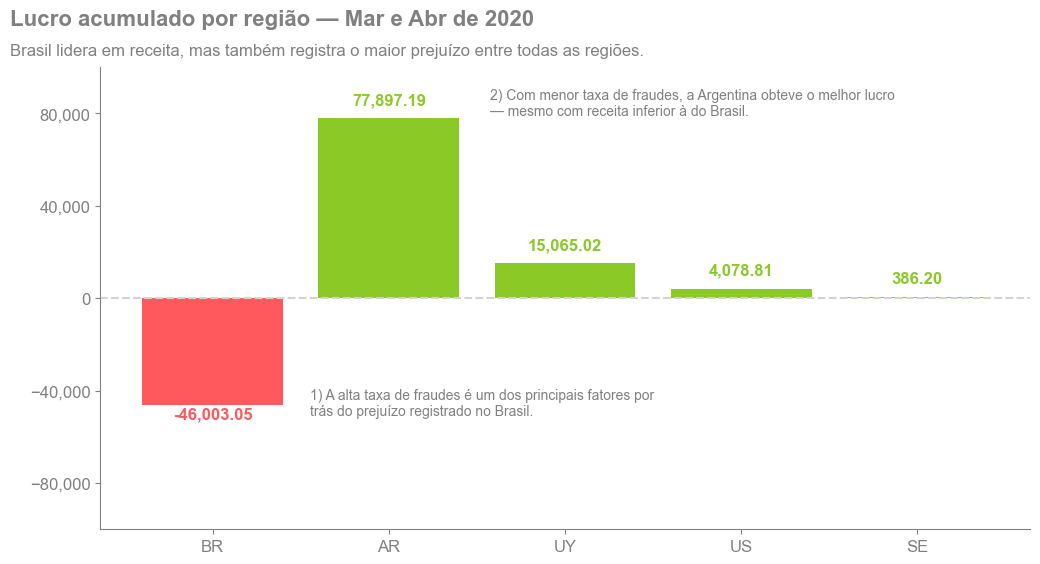

In [51]:
# Figura e eixos
fig, ax = plt.subplots(figsize=(12, 6), facecolor="white")

# Selecionar top 5 países por volume total de pedidos
top_five = fraudes_regiao_df.nlargest(5, "volume_total")

# Gráfico de barras verticais com coloração condicional
bars = ax.bar(x="pais", height="lucros", data=top_five, color=top_five["color"])

# Rótulo das barras (lucro ou prejuízo)
for _, row in top_five.iterrows():
    offset = 10 if row["lucros"] > 0 else -10
    ax.annotate(
        text=f"{row['lucros']:,.2f}",
        xy=(row["pais"], row["lucros"]),
        xytext=(0, offset),
        textcoords="offset points",
        ha="center",
        fontsize=12,
        color=row["color"],
        fontname="Arial",
        weight="bold",
    )

# Formatar eixos
ax.set_ylim(-100000, 100000)
ax.yaxis.set_major_formatter("{x:,.0f}")
ax.set_yticks([-80000, -40000, 0, 40000, 80000])
ax.tick_params(colors="grey", labelsize=12)

# Adicionar linha horizontal - zero
ax.axhline(0, 0, 1, linestyle="--", color="lightgrey")

# Título
fig.text(
    x=0.05,
    y=0.95,
    s="Lucro acumulado por região — Mar e Abr de 2020",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

# Subtítulo
fig.text(
    x=0.05,
    y=0.90,
    s="Brasil lidera em receita, mas também registra o maior prejuízo entre todas as regiões.",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Comentários
fig.text(
    x=0.30,
    y=0.30,
    s="1) A alta taxa de fraudes é um dos principais fatores por\ntrás do prejuízo registrado no Brasil.",
    fontdict={"fontname": "Arial", "fontsize": 10, "color": "grey"},
)

fig.text(
    x=0.45,
    y=0.80,
    s="2) Com menor taxa de fraudes, a Argentina obteve o melhor lucro\n— mesmo com receita inferior à do Brasil.",
    fontdict={"fontname": "Arial", "fontsize": 10, "color": "grey"},
)

# Limpar bordas
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["bottom", "left"]].set_color("grey")

# Mostrar gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/6-lucros_regiao.png",
    dpi="figure",
)

#### 4.4.3. Taxa de fraudes por região

Abaixo, fica claro que taxa de fraude do Brasil, em vermelho, é a maior entre as 5 analisadas. O Uruguai (UY), cujo volume de pedidos é signifcativamente menor que o do Brasil, tem a menor taxa de fraudes e o segundo maior lucro.

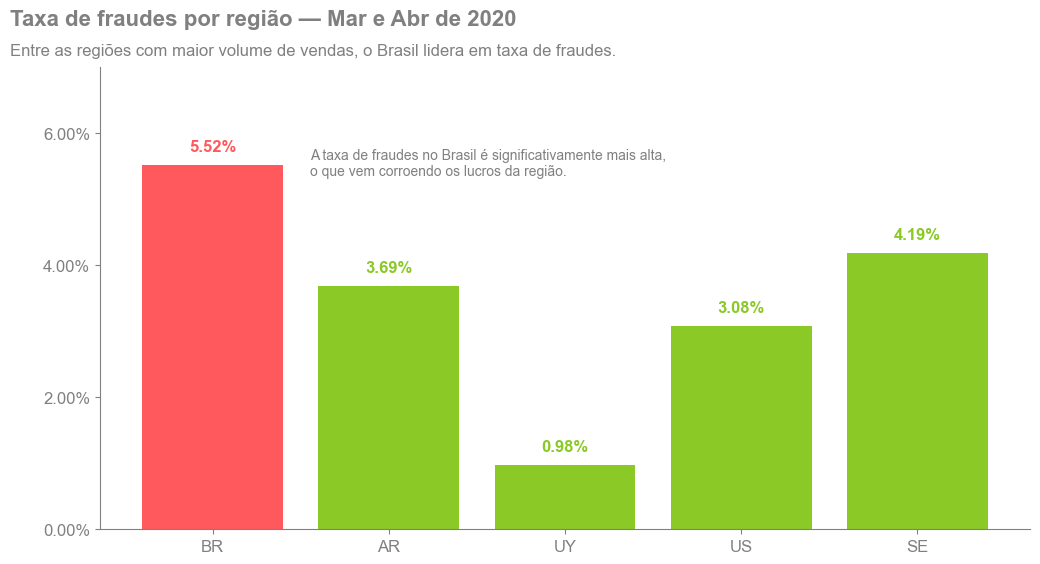

In [ ]:
# Figura e eixos
fig, ax = plt.subplots(figsize=(12, 6), facecolor="white")

# Selecionar top 5 países por volume total de pedidos
top_five = fraudes_regiao_df.nlargest(5, "volume_total")

# Gráfico de barras verticais com coloração condicional
bars = ax.bar(x="pais", height="taxa_fraude", data=top_five, color=top_five["color"])

# Rótulo das barras (lucro ou prejuízo)
for _, row in top_five.iterrows():
    ax.annotate(
        text=f"{row['taxa_fraude']:,.2%}",
        xy=(row["pais"], row["taxa_fraude"]),
        xytext=(0, 10),
        textcoords="offset points",
        ha="center",
        fontsize=12,
        color=row["color"],
        fontname="Arial",
        weight="bold",
    )

# Formatar eixos
ax.set_ylim(0, 0.07)
ax.yaxis.set_major_formatter("{x:,.2%}")
ax.set_yticks([0, 0.02, 0.04, 0.06])
ax.tick_params(colors="grey", labelsize=12)

# Adicionar linha horizontal - zero
# ax.axhline(0, 0, 1, linestyle='--', color='lightgrey')

# Título
fig.text(
    x=0.05,
    y=0.95,
    s="Taxa de fraudes por região — Mar e Abr de 2020",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

# Subtítulo
fig.text(
    x=0.05,
    y=0.90,
    s="Entre as regiões com maior volume de vendas, o Brasil lidera em taxa de fraudes.",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Comentário
fig.text(
    x=0.30,
    y=0.70,
    s="A taxa de fraudes no Brasil é significativamente mais alta,\no que vem corroendo os lucros da região.",
    fontdict={"fontname": "Arial", "fontsize": 10, "color": "grey"},
)

# Limpar bordas
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["bottom", "left"]].set_color("grey")

# Mostrar gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/7-taxa_fraude_regiao.png",
    dpi="figure",
)

#### 4.4.4. Valor médio das transações por região

Como discutido anteriormente, o valor médio das fraudes impacta diretamente os resultados financeiros. No entanto, mesmo com valores médios elevados, é possível obter lucro — como demonstram os casos da Argentina (AR) e dos Estados Unidos (US), que apresentaram resultados positivos apesar de altos valores médios de fraude.

O Brasil teve o 3º maior valor médio de fraudes entre as 5 regiões analisadas, mas apenas o 4º maior valor médio de pedidos legítimos. Isso reforça que tanto o valor médio das fraudes quanto o baixo valor médio das transações legítimas contribuíram para o resultado negativo da região no período.

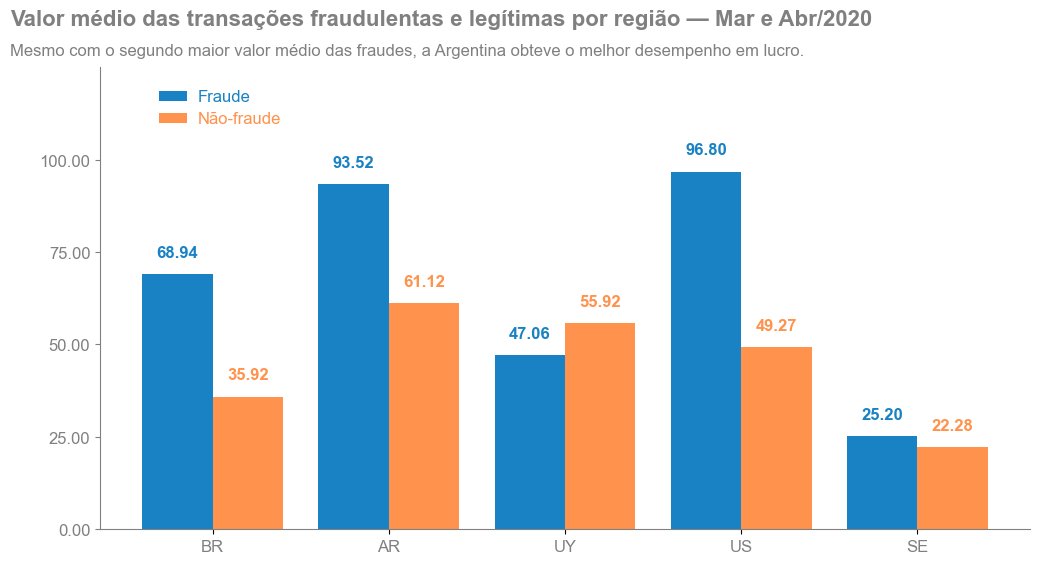

In [54]:
# Figura e eixos
fig, ax = plt.subplots(figsize=(12, 6), facecolor="white")

# Colunas e propriedades
cols = ["valor_medio_fraude", "valor_medio_nao_fraude"]
colors = ["#1982C4", "#FF924C"]
labels = ["Fraude", "Não-fraude"]
width = 0.25

# Eixo x automático com base no número de meses
x = np.linspace(0, 2.5, len(top_five))

# Gráfico de barras agrupadas
for i, (col, label, color) in enumerate(zip(cols, labels, colors)):
    offset = width * i
    bars = ax.bar(x + offset, top_five[col], width=width, label=label, color=color)

    ax.bar_label(
        bars,
        padding=10,
        fmt="{:,.2f}",
        fontname="Arial",
        fontsize=12,
        color=color,
        weight="bold",
    )

# Ticks no eixo x com nomes dos meses
ax.set_xticks(x + width / 2)
ax.set_xticklabels(top_five["pais"], fontname="Arial", fontsize=12, color="grey")

# Configurar ticks no eixo y e formatar
ax.set_ylim(0, 125)
ax.set_yticks([0, 25, 50, 75, 100])
ax.yaxis.set_major_formatter("{x:,.2f}")
ax.tick_params(axis="y", colors="grey", labelsize=12, labelcolor="grey")

# Título
fig.text(
    x=0.05,
    y=0.95,
    s="Valor médio das transações fraudulentas e legítimas por região — Mar e Abr/2020",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

# Subtítulo
fig.text(
    x=0.05,
    y=0.90,
    s="Mesmo com o segundo maior valor médio das fraudes, a Argentina obteve o melhor desempenho em lucro.",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Legenda
legend = ax.legend(loc="upper left", bbox_to_anchor=(0.05, 0.98))
for text, color in zip(legend.get_texts(), colors):
    text.set_fontfamily("Arial")
    text.set_color(color)
    text.set_fontsize(12)
legend.legendPatch.set_linewidth(0)

# Limpar bordas
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["bottom", "left"]].set_color("grey")

# Mostrar gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/8-valor_medio_regiao.png",
    dpi="figure",
)

### 4.5. Desempenho por categoria de produto

O conjunto de dados contém um total de 8.324 categorias de produto. Para simplificar a análise, optou-se por focar nas 5 categorias com maior lucro e nas 5 com maior prejuízo, totalizando 10 categorias. A partir delas, foram analisados os principais indicadores para entender os fatores que influenciaram seus resultados.

In [ ]:
# Total de categorias de produto únicas
df["categoria_produto"].cat.categories.size

8324

#### 4.5.1. Obtenção dos dados


In [77]:
# Agrupar por país e fraude
fraudes_categoria_df = pd.pivot_table(
    df,
    index="categoria_produto",
    columns="fraude",
    values="valor_compra",
    aggfunc=["count", "sum", "mean"],
    observed=False,
    dropna=False,
    fill_value=0,
)

# Limpar nomes das colunas
fraudes_categoria_df.columns = [
    "_".join(map(str, col)).strip() for col in fraudes_categoria_df.columns.values
]

# Renomear colunas
fraudes_categoria_df.rename(
    columns={
        "count_0": "volume_nao_fraude",
        "count_1": "volume_fraude",
        "sum_0": "valor_nao_fraude",
        "sum_1": "valor_fraude",
        "mean_0": "valor_medio_nao_fraude",
        "mean_1": "valor_medio_fraude",
    },
    inplace=True,
)

# Calcular total de pedidos por país
fraudes_categoria_df["volume_total"] = (
    fraudes_categoria_df["volume_nao_fraude"] + fraudes_categoria_df["volume_fraude"]
)

# Ordenar do maior para o menor volume
fraudes_categoria_df.sort_values(by="volume_total", ascending=False, inplace=True)

# Calcular percentual acumulado de pedidos
fraudes_categoria_df["volume_acumulado_pct"] = (
    fraudes_categoria_df["volume_total"].cumsum()
    / fraudes_categoria_df["volume_total"].sum()
)

# Calcular taxa de fraude por país
fraudes_categoria_df["taxa_fraude"] = (
    fraudes_categoria_df["volume_fraude"] / fraudes_categoria_df["volume_total"]
)

# Calcular receitas e lucros (margem de 10%)
fraudes_categoria_df["receitas"] = 0.10 * fraudes_categoria_df["valor_nao_fraude"]
fraudes_categoria_df["lucros"] = (
    fraudes_categoria_df["receitas"] - fraudes_categoria_df["valor_fraude"]
)

# Resetar índice
fraudes_categoria_df.reset_index(inplace=True)

# Visualizar os DataFrame - Top 10 categorias em volume total de pedidos
fraudes_categoria_df.head(10)

,categoria_produto,volume_nao_fraude,volume_fraude,valor_nao_fraude,valor_fraude,valor_medio_nao_fraude,valor_medio_fraude,volume_total,volume_acumulado_pct,taxa_fraude,receitas,lucros
0,cat_43b9c10,1951,380,474357.62,115155.71,243.135633,303.041342,2331,0.015540,0.163020,47435.762,-67719.948
1,cat_d69bed9,1745,54,46678.94,1658.84,26.750109,30.719259,1799,0.027533,0.030017,4667.894,3009.054
2,cat_604df77,1713,71,47161.12,3241.65,27.531302,45.657042,1784,0.039427,0.039798,4716.112,1474.462
3,cat_6c4cfdc,1375,74,19530.57,1425.72,14.204051,19.266486,1449,0.049087,0.051070,1953.057,527.337
4,cat_4249bd8,1093,98,31343.47,3432.19,28.676551,35.022347,1191,0.057027,0.082284,3134.347,-297.843
5,cat_3203c7c,1074,19,17186.03,401.05,16.001890,21.107895,1093,0.064313,0.017383,1718.603,1317.553
6,cat_be0af8e,988,52,25347.02,1643.26,25.654879,31.601154,1040,0.071247,0.050000,2534.702,891.442
7,cat_0820fab,890,48,8151.09,419.51,9.158528,8.739792,938,0.077500,0.051173,815.109,395.599
8,cat_8ef7164,828,81,14849.12,1050.45,17.933720,12.968519,909,0.083560,0.089109,1484.912,434.462
9,cat_d5975ae,818,60,9520.15,1383.15,11.638325,23.052500,878,0.089413,0.068337,952.015,-431.135


In [ ]:
# Top 5 categorias com maior receita
fraudes_categoria_df.nlargest(5, "receitas")[
    ["categoria_produto", "receitas", "lucros"]
]

,categoria_produto,receitas,lucros
0,cat_43b9c10,47435.762,-67719.948
46,cat_e5ca240,15735.759,-20715.731
50,cat_23212a0,8510.095,-16356.495
45,cat_a4921b8,5029.414,2725.114
2,cat_604df77,4716.112,1474.462


#### 4.5.2. Produtos com maior lucro e maior prejuízo

Abaixo, as categorias foram plotadas em ordem decrescente, dos maiores lucros (em verde) aos maiores prejuízos (em vermelho).

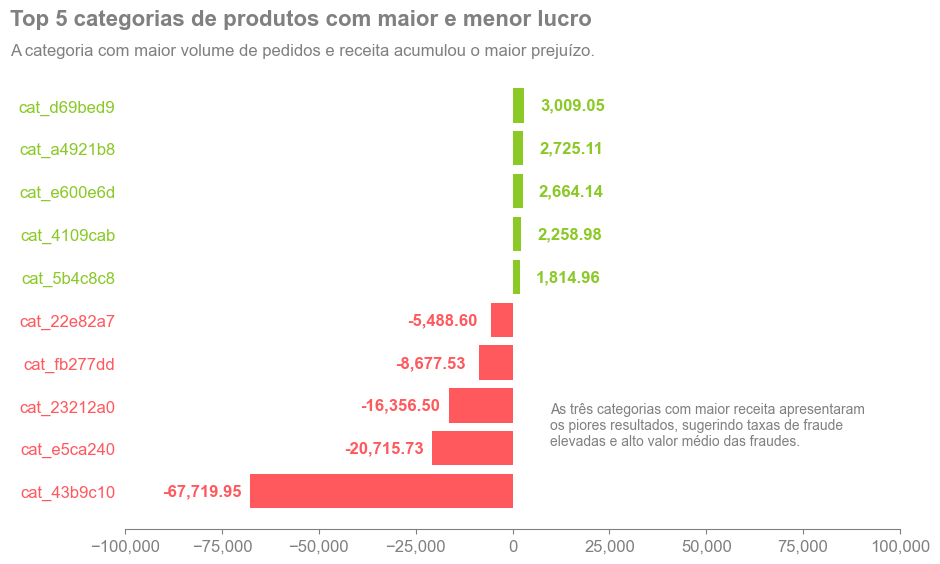

In [78]:
# Figura e eixos
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor="white")

# Gráfico de barras horizontais
bar_data = pd.concat(
    [
        fraudes_categoria_df.nlargest(5, "lucros"),
        fraudes_categoria_df.nsmallest(5, "lucros"),
    ]
).sort_values("lucros", ascending=True)

bar_data["color"] = np.where(bar_data["lucros"] > 0, "#8AC926", "#FF595E")
bar = ax.barh(
    y=bar_data["categoria_produto"],
    width=bar_data["lucros"],
    color=bar_data["color"],
)

# Rótulo das barras (lucro ou prejuízo)
for _, row in bar_data.iterrows():
    offset = 35 if row["lucros"] > 0 else -35
    ax.annotate(
        text=f"{row['lucros']:,.2f}",
        xy=(row["lucros"], row["categoria_produto"]),
        xytext=(offset, 0),
        textcoords="offset points",
        ha="center",
        va="center",
        fontsize=12,
        color=row["color"],
        fontname="Arial",
        weight="bold",
    )

# Limites do eixo x
ax.set_xlim(-100000, 100000)

# Estilo dos rótulos de eixo, coloridos conforme lucro/prejuízo
for ytick_label, lucro in zip(ax.get_yticklabels(), bar_data["lucros"]):
    ytick_label.set_fontname("Arial")
    ytick_label.set_fontsize(12)
    color = (
        "#8AC926" if lucro > 0 else "#FF595E"
    )  # Cor: verde para lucro, vermelho para prejuízo
    ytick_label.set_color(color)

# Ticks
ax.tick_params(axis="x", color="grey", labelsize=12, labelcolor="grey", left=False)
ax.tick_params(axis="y", left=False)

# Formatar eixo x
ax.xaxis.set_major_formatter("{x:,.0f}")

# Título
fig.text(
    x=0.01,
    y=0.95,
    s="Top 5 categorias de produtos com maior e menor lucro",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

# Subtítulo
fig.text(
    x=0.01,
    y=0.90,
    s="A categoria com maior volume de pedidos e receita acumulou o maior prejuízo.",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Comentários
fig.text(
    x=0.55,
    y=0.25,
    s="As três categorias com maior receita apresentaram\nos piores resultados, sugerindo taxas de fraude\nelevadas e alto valor médio das fraudes.",
    fontdict={"fontname": "Arial", "fontsize": 10, "color": "grey"},
)

# Limpar bordas
ax.spines[["left", "top", "right"]].set_visible(False)
ax.spines["bottom"].set_color("grey")

# Mostrar gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/9-categorias_resultados.png",
    dpi="figure",
)

#### 4.5.3. Taxa de fraude nas categorias com maior lucro e maior prejuízo

A figura abaixo mostra que as categorias com maior prejuízo apresentam taxas de fraude significativamente mais altas. Isso ajuda a explicar seus resultados negativos e sugere que essas categorias podem estar desproporcionalmente associadas a transações fraudulentas.

Observação: a ordem das categorias no eixo y foi mantida neste e no próximo gráfico, para manter a consistência visual.

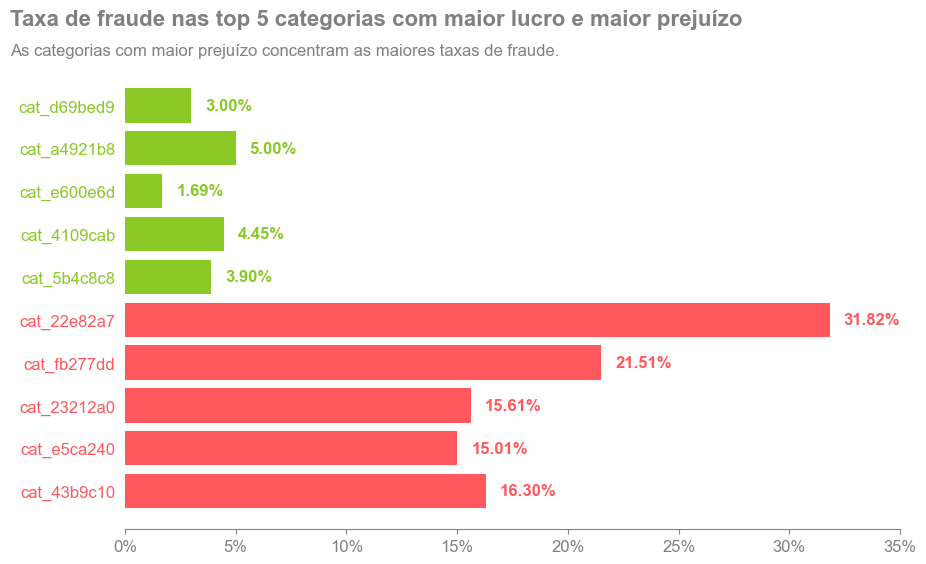

In [79]:
# Figura e eixos
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor="white")

# Gráfico de barras horizontais
bar_data = pd.concat(
    [
        fraudes_categoria_df.nlargest(5, "lucros"),
        fraudes_categoria_df.nsmallest(5, "lucros"),
    ]
).sort_values("lucros", ascending=True)

bar_data["color"] = np.where(bar_data["lucros"] > 0, "#8AC926", "#FF595E")
bar = ax.barh(
    y=bar_data["categoria_produto"],
    width=bar_data["taxa_fraude"],
    color=bar_data["color"],
)

# Rótulo das barras
for _, row in bar_data.iterrows():
    ax.annotate(
        text=f"{row['taxa_fraude']:,.2%}",
        xy=(row["taxa_fraude"], row["categoria_produto"]),
        xytext=(10, 0),
        textcoords="offset points",
        ha="left",
        va="center",
        fontsize=12,
        color=row["color"],
        fontname="Arial",
        weight="bold",
    )

# Limites do eixo x
ax.set_xlim(0, 0.35)

# Estilo dos rótulos de eixo, coloridos conforme lucro/prejuízo
for ytick_label, lucro in zip(ax.get_yticklabels(), bar_data["lucros"]):
    ytick_label.set_fontname("Arial")
    ytick_label.set_fontsize(12)
    color = (
        "#8AC926" if lucro > 0 else "#FF595E"
    )  # Cor: verde para lucro, vermelho para prejuízo
    ytick_label.set_color(color)

# Ticks
ax.set_xticks([0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35])
ax.tick_params(axis="x", color="grey", labelsize=12, labelcolor="grey", left=False)
ax.tick_params(axis="y", left=False)

# Formatar eixo x
ax.xaxis.set_major_formatter("{x:,.0%}")

# Título
fig.text(
    x=0.01,
    y=0.95,
    s="Taxa de fraude nas top 5 categorias com maior lucro e maior prejuízo",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

# Subtítulo
fig.text(
    x=0.01,
    y=0.90,
    s="As categorias com maior prejuízo concentram as maiores taxas de fraude.",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Limpar bordas
ax.spines[["left", "top", "right"]].set_visible(False)
ax.spines["bottom"].set_color("grey")

# Mostrar gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/10-categorias_taxa_fraude.png",
    dpi="figure",
)

#### 4.5.4. Valor médio das fraudes nas categorias com maior lucro e maior prejuízo

Além das altas taxas de fraude, as categorias com prejuízo também apresentam valores médios de fraude significativamente superiores aos das categorias com lucro. Esse fator contribui diretamente para os resultados negativos observados.

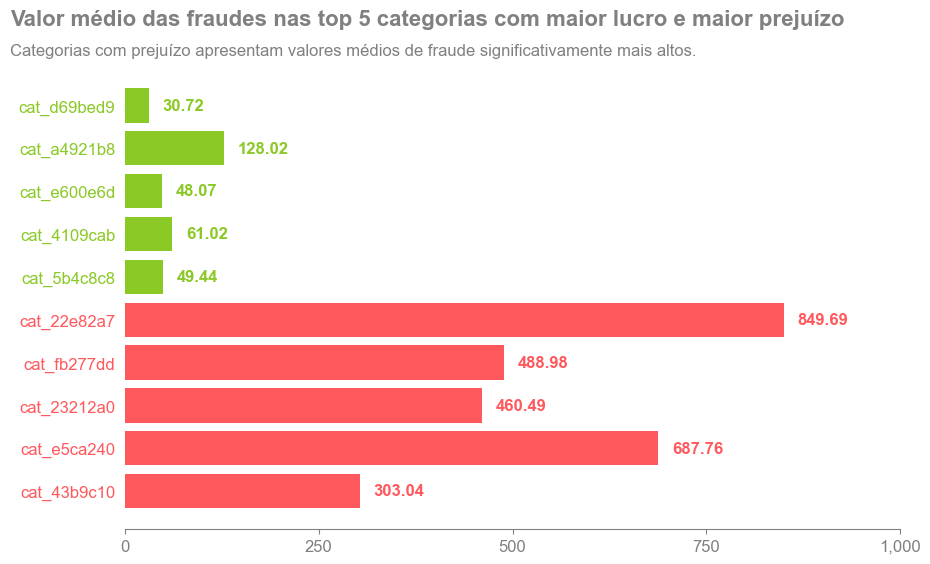

In [80]:
# Figura e eixos
fig, ax = plt.subplots(1, figsize=(10, 6), facecolor="white")

# Gráfico de barras horizontais
bar_data = pd.concat(
    [
        fraudes_categoria_df.nlargest(5, "lucros"),
        fraudes_categoria_df.nsmallest(5, "lucros"),
    ]
).sort_values("lucros", ascending=True)

bar_data["color"] = np.where(bar_data["lucros"] > 0, "#8AC926", "#FF595E")
bar = ax.barh(
    y=bar_data["categoria_produto"],
    width=bar_data["valor_medio_fraude"],
    color=bar_data["color"],
)

# Rótulo das barras
for _, row in bar_data.iterrows():
    ax.annotate(
        text=f"{row['valor_medio_fraude']:,.2f}",
        xy=(row["valor_medio_fraude"], row["categoria_produto"]),
        xytext=(10, 0),
        textcoords="offset points",
        ha="left",
        va="center",
        fontsize=12,
        color=row["color"],
        fontname="Arial",
        weight="bold",
    )

# Estilo dos rótulos de eixo, coloridos conforme lucro/prejuízo
for ytick_label, lucro in zip(ax.get_yticklabels(), bar_data["lucros"]):
    ytick_label.set_fontname("Arial")
    ytick_label.set_fontsize(12)
    color = (
        "#8AC926" if lucro > 0 else "#FF595E"
    )  # Cor: verde para lucro, vermelho para prejuízo
    ytick_label.set_color(color)

# Ticks
ax.set_xticks([0, 250, 500, 750, 1000])
ax.tick_params(axis="x", color="grey", labelsize=12, labelcolor="grey", left=False)
ax.tick_params(axis="y", left=False)

# Formatar eixo x
ax.xaxis.set_major_formatter("{x:,.0f}")

# Título
fig.text(
    x=0.01,
    y=0.95,
    s="Valor médio das fraudes nas top 5 categorias com maior lucro e maior prejuízo",
    fontdict={
        "fontname": "Arial",
        "fontsize": 16,
        "color": "grey",
        "weight": "bold",
    },
)

# Subtítulo
fig.text(
    x=0.01,
    y=0.90,
    s="Categorias com prejuízo apresentam valores médios de fraude significativamente mais altos.",
    fontdict={"fontname": "Arial", "fontsize": 12, "color": "grey"},
)

# Limpar bordas
ax.spines[["left", "top", "right"]].set_visible(False)
ax.spines["bottom"].set_color("grey")

# Mostrar gráfico
plt.show()

# Salvar
fig.savefig(
    "/home/mcastro/Documents/visual_studio_code_files/case-fraude/figures/11-categorias_valor_medio.png",
    dpi="figure",
)

## 5. ANÁLISE EXPLORATÓRIA DE DADOS (EDA)